In [1]:
import random
import copy
import statistics

In [2]:
# n = 4
# t = 0.5
# edges = [[0, 1, [1, 1, 1]], [0, 2, [1, 1, 0]], [0, 3, [0, 1, 0]], [1, 0, [0, 0, 0]], [1, 2, [0, 0, 0]], [1, 3, [0, 0, 1]], [2, 0, [0, 0, 0]],
#          [2, 1, [0, 0, 0]], [2, 3, [1, 0, 0]], [3, 0, [0, 0, 0]], [3, 1, [0, 0, 0]], [3, 2, [0, 0, 1]]]
# random.shuffle(edges)

In [3]:
n = 10
t = 0.5
mm = 10
pc = 0
num = 10
edges = [[x,y,[pc for i in range(mm)]] for x in range(n) for y in range(n) if x!=y]
ran = [i for i in range(len(edges))]
for i in range(mm):
    random.shuffle(ran)
    for j in range(num):
        edges[ran[j]][2][i] += 1
random.shuffle(edges)

In [4]:
edges

[[4, 6, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
 [9, 0, [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
 [8, 7, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
 [5, 6, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
 [9, 6, [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]],
 [4, 8, [0, 0, 0, 0, 0, 0, 1, 0, 0, 0]],
 [6, 2, [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]],
 [6, 8, [0, 1, 0, 0, 0, 1, 0, 0, 0, 0]],
 [3, 9, [0, 0, 0, 1, 0, 0, 0, 0, 0, 1]],
 [3, 1, [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]],
 [6, 0, [1, 0, 1, 0, 0, 0, 0, 0, 0, 0]],
 [2, 6, [1, 0, 0, 0, 0, 0, 0, 0, 0, 1]],
 [2, 8, [0, 0, 1, 0, 0, 0, 1, 0, 0, 0]],
 [0, 7, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
 [5, 2, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
 [5, 8, [1, 0, 0, 1, 1, 0, 1, 0, 1, 0]],
 [8, 0, [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]],
 [5, 3, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
 [3, 4, [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]],
 [0, 5, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
 [2, 7, [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]],
 [7, 4, [0, 1, 0, 1, 0, 0, 1, 0, 0, 0]],
 [1, 9, [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]],
 [9, 3, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
 [1, 0, [0, 0, 0

In [5]:
g = list()
for i in range(n):
    g.append(list())
for temp in edges:
    g[temp[0]].append(temp[1])
w = {}
for temp in edges:
    w[(temp[0],temp[1])] = temp[2].copy()

In [6]:
def dp(x,y,g,w):
    s = sum(w[(x,y)])
    # print(x,y,w)
    for i in range(len(w[(x,y)])):
        for z in g[y]:
            if z==x or z==y: continue
            w[(x,y)][i] += max(w[(y,z)][i], t*max(w[(y,z)]))
    ns = sum(w[(x,y)])
    # print(x,y,w)
    if ns!=0:
        for i in range(len(w[(x,y)])):
            w[(x,y)][i] *= (s/ns)
    # print(x,y,w)
    return

In [7]:
err = []
prev = []
mid = []
more_mid = []
erm = []
z = [w[key].copy() for key in sorted(w.keys())]
for j in range(10):
    for temp in edges: dp(temp[0],temp[1],g,w)
    sm = 0
    cur = [w[key].copy() for key in sorted(w.keys())]
    mid.append(w[(9,7)][0])
    more_mid.append(w[(9,7)][1])
    std=0
    for l in list(w.values()):
        std += statistics.stdev(l)
    erm.append(std)
    if j==0: f = [w[key].copy() for key in sorted(w.keys())]
    if j!=0:
        for i in range(len(cur)):
            for m in range(len(cur[0])):
                sm += (cur[i][m] - prev[i][m])**2
        err.append(round(sm,4))
    prev = copy.deepcopy(cur)
print(err)

[0.5712, 0.0685, 0.0086, 0.0011, 0.0001, 0.0, 0.0, 0.0, 0.0]


In [8]:
mid

[0.16596739803287708,
 0.19420327001122425,
 0.2111081387908391,
 0.21519199387214477,
 0.21540735599151042,
 0.21519975702976793,
 0.21508962714442983,
 0.21504858376343935,
 0.21503276122570172,
 0.21502553164535598]

In [9]:
more_mid

[0.24049109292248433,
 0.20468164083113172,
 0.2009234308413444,
 0.19651192459035027,
 0.1941874531527437,
 0.19341691066223757,
 0.19323893008116963,
 0.19322266531122426,
 0.19323601241116237,
 0.19324807058021823]

In [10]:
erm

[2.325082928666167,
 0.9573311253371396,
 0.5981605215758482,
 0.5480806855722847,
 0.5422114191644287,
 0.5419379106235787,
 0.5422056986789519,
 0.5423859591409647,
 0.5424682421986367,
 0.5425011466352476]

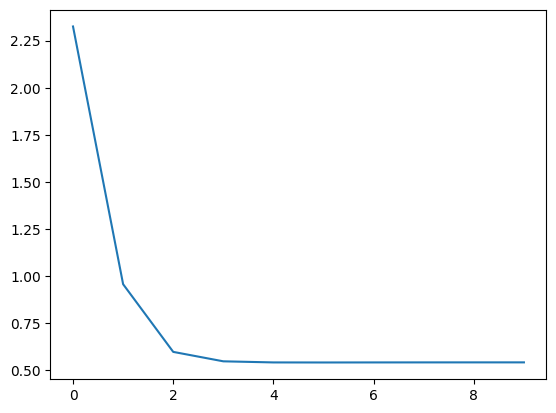

In [11]:
import matplotlib.pyplot as plt
plt.plot(range(len(erm)), erm)

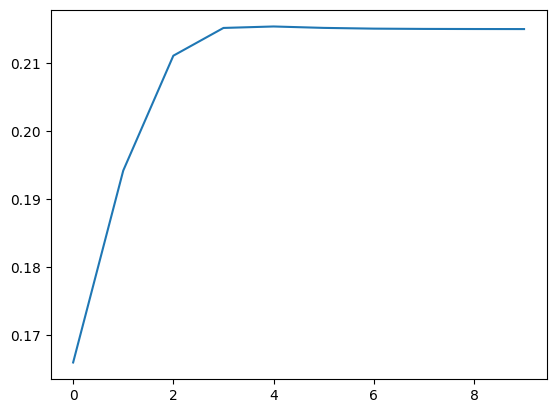

In [12]:
import matplotlib.pyplot as plt
plt.plot(range(len(mid)), mid)

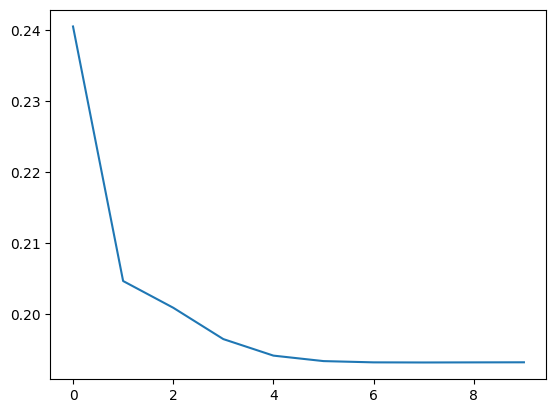

In [13]:
import matplotlib.pyplot as plt
plt.plot(range(len(more_mid)), more_mid)

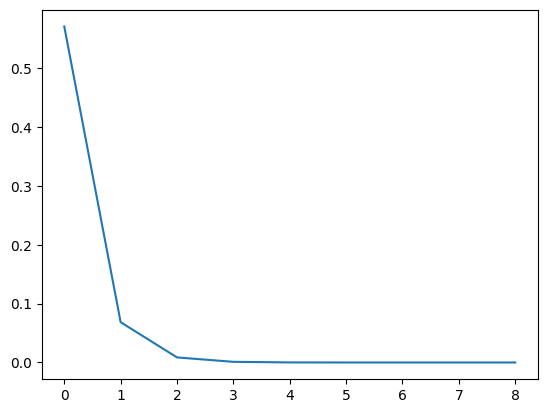

In [14]:
import matplotlib.pyplot as plt
plt.plot(range(len(err)), err)

In [15]:
sorted(edges)

[[0, 1, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
 [0, 2, [0, 0, 0, 0, 0, 0, 1, 0, 0, 0]],
 [0, 3, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
 [0, 4, [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]],
 [0, 5, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
 [0, 6, [0, 0, 0, 0, 0, 1, 0, 0, 0, 1]],
 [0, 7, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
 [0, 8, [0, 0, 0, 0, 0, 1, 0, 1, 0, 0]],
 [0, 9, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
 [1, 0, [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]],
 [1, 2, [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
 [1, 3, [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]],
 [1, 4, [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]],
 [1, 5, [0, 0, 0, 0, 0, 0, 0, 0, 1, 1]],
 [1, 6, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
 [1, 7, [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]],
 [1, 8, [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]],
 [1, 9, [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]],
 [2, 0, [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]],
 [2, 1, [0, 0, 0, 0, 0, 0, 0, 0, 1, 1]],
 [2, 3, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
 [2, 4, [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]],
 [2, 5, [0, 0, 0, 0, 1, 0, 1, 1, 0, 0]],
 [2, 6, [1, 0, 0, 0, 0, 0, 0, 0, 0, 1]],
 [2, 7, [0, 0, 0

In [16]:
z

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 1, 1, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
 [0, 1, 0,

In [17]:
f

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.08550049239478202,
  0.08571179994922998,
  0.09149956581765999,
  0.08382989701170582,
  0.09541657684828203,
  0.08869316775726292,
  0.1853947034701341,
  0.09559826428619886,
  0.08899131099432143,
  0.09936422147042277],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0920086219945915,
  0.10988301070376404,
  0.10571790704516529,
  0.12652167756340454,
  0.1061650708263304,
  0.10386163585918906,
  0.0838214599466561,
  0.10518718277729937,
  0.08280837232456463,
  0.08402506095903503],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.16358702146510712,
  0.16768498737498283,
  0.21023083951036806,
  0.16782640752619268,
  0.15703851142867026,
  0.3256577004937861,
  0.16054623804013607,
  0.16111016215446475,
  0.21442845747386494,
  0.27188967453242713],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.22641509433962265,
  0.18867924528301885,
  0.18867924528301885,
  0.1509433962264151,
  0.15094

In [18]:
[w[key] for key in sorted(w.keys())]

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.10750828921798719,
  0.0966313135656773,
  0.10408810711875467,
  0.09146677075216825,
  0.09774348651113154,
  0.10943209981277313,
  0.09876391325481083,
  0.0990853923241441,
  0.0975007988230537,
  0.09777982861949926],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.10750728815992744,
  0.09663025068846726,
  0.10409036010599285,
  0.0914644981618952,
  0.09773977198089913,
  0.10943690912991041,
  0.09876356842355882,
  0.09908641449611191,
  0.09750248681361984,
  0.0977784520396172],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.21501791860312233,
  0.19326251043920048,
  0.20816893041581683,
  0.182935292635555,
  0.19548972454002603,
  0.218857183603024,
  0.197531003338908,
  0.19816197199520347,
  0.1950059275502904,
  0.19556953687885348],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.21501946884856318,
  0.19326426219010504,
  0.20817980620126741,
  0.1829328262233835,
  0.195486182859